In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
font = {'family': 'serif', 'serif': ['Times New Roman'], 'style': 'normal'}
plt.rc('font', **font)

In [10]:
data = pd.read_csv('data.csv')  # read csv
X = data.iloc[:, :25]  # X feature
X

,MA,FA,Cs,Pb,Sn,Other,I,Br,Gap,Po,...,Add_H,Step,Solvent,Coated1_v,Coated1_t,Coated2_v,Coated2_t,Antisolvent,Anneal_T,Anneal_t
0,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.615970,1,...,0,0.5,0.75,0.500,0.222222,0.000000,0.000000,1,0.285714,0.022222
1,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.615970,0,...,0,0.5,0.75,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
2,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
3,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
4,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.612167,0,...,0,0.5,1.00,0.500,0.333333,0.000000,0.000000,1,0.285714,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.3,0.70,0.50,0.5,0.5,0.0,1.0,0.0,0.482890,0,...,1,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
616,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
617,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111
618,0.3,0.60,0.10,0.5,0.5,0.0,1.0,0.0,0.475285,0,...,0,1.0,0.75,0.125,0.111111,0.666667,0.666667,1,0.285714,0.111111


### **J_sc**

Best Parameters for jsc: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150, 'subsample': 0.8}
MSE: 7.1637, RMSE: 2.6765, R²: 0.8464, MAE:1.3923961201972956
Params: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150, 'subsample': 0.8}
Mean Test R²: 0.8415987871186792
Mean Test Neg MSE: -5.9872178556347055
Std Test R²: 0.06738686445452069
Std Test Neg MSE: 2.9405170385636206
--------------------------------------------------
Params: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200, 'subsample': 0.8}
Mean Test R²: 0.8397353227182967
Mean Test Neg MSE: -6.048973723788029
Std Test R²: 0.06639185654505825
Std Test Neg MSE: 2.9160568167563037
--------------------------------------------------
Params: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 150, 'subsample': 0.7}
Mean Test R²: 0.8376821966781078
Mean Test Neg MSE: -6.071117182530841
Std Test R²: 0.052413

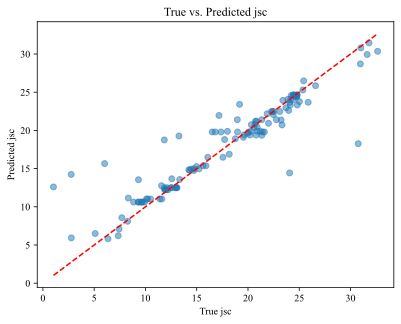

In [11]:
# 1. data split
X_jsc = data.iloc[:, :25]  # X feature
y_jsc = data['Jsc']  # target feature
X_jsc_train, X_jsc_test, y_jsc_train, y_jsc_test = train_test_split(X_jsc, y_jsc, test_size=0.2, random_state=42)

# 2. GBDT model
# parameter grid
param_grid_jsc = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [150, 200],
    'subsample': [0.7, 0.8, 0.9],
    'max_depth': [5, 7],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Gradient-boosted decision trees regressor
gbdt_reg = GradientBoostingRegressor(random_state=42) 

# 3. Grid searching for jsc
grid_jsc_search = GridSearchCV(
    estimator=gbdt_reg,
    param_grid=param_grid_jsc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_jsc_search.fit(X_jsc_train, y_jsc_train)

# Best model for jsc
best_gbdt_reg_jsc = grid_jsc_search.best_estimator_


# 4. Model evaluation on test set for jsc
y_jsc_pred = best_gbdt_reg_jsc.predict(X_jsc_test)
mse_jsc = mean_squared_error(y_jsc_test, y_jsc_pred)
rmse_jsc = mse_jsc**0.5
mae_jsc = mean_absolute_error(y_jsc_test, y_jsc_pred)
r2_jsc = r2_score(y_jsc_test, y_jsc_pred)

print(f"Best Parameters for jsc: {grid_jsc_search.best_params_}")
print(f"MSE: {mse_jsc:.4f}, RMSE: {rmse_jsc:.4f}, R²: {r2_jsc:.4f}, MAE:{mae_jsc}")

# 5. Get cross-validation results for jsc
cv_jsc_results_df = pd.DataFrame(grid_jsc_search.cv_results_)
cv_jsc_results_df = cv_jsc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for jsc
best_cv_jsc_score_r2 = grid_jsc_search.best_score_
best_cv_jsc_score_neg_mse = -grid_jsc_search.cv_results_['mean_test_neg_mse'][grid_jsc_search.best_index_]

for index, row in cv_jsc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for jsc: {best_cv_jsc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for jsc: {best_cv_jsc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for jsc: {grid_jsc_search.best_params_}")


# 6. Visualization for jsc
plt.scatter(y_jsc_test, y_jsc_pred, alpha=0.5)
plt.plot([y_jsc_test.min(), y_jsc_test.max()], [y_jsc_test.min(), y_jsc_test.max()], 'r--')
plt.xlabel('True jsc')
plt.ylabel('Predicted jsc')
plt.title('True vs. Predicted jsc')
plt.show()

### **V_oc**

Best Parameters for voc: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.9}
MSE: 0.0078, RMSE: 0.0883, R²: 0.9236, MAE:0.050999117734222076
Params: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.9}
Mean Test R²: 0.9382553288946932
Mean Test Neg MSE: -0.005516387232239938
Std Test R²: 0.009881794315408485
Std Test Neg MSE: 0.001789157289431886
--------------------------------------------------
Params: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.9}
Mean Test R²: 0.9379692036664766
Mean Test Neg MSE: -0.005534748947622063
Std Test R²: 0.009282943514553568
Std Test Neg MSE: 0.0017585888820270729
--------------------------------------------------
Params: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 150, 'subsample': 0.9}
Mean Test R²: 0.937897967909249
Mean Test Neg MSE: -0.005547360476137692
Std Test 

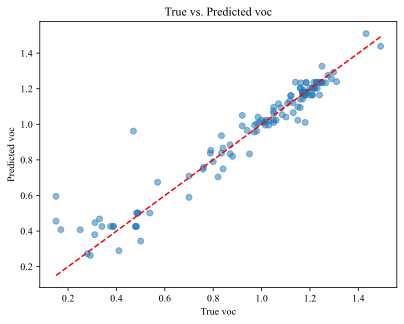

In [12]:
# 1. data split
X_voc = data.iloc[:, :25]  # X feature
y_voc = data['Voc']  # target feature
X_voc_train, X_voc_test, y_voc_train, y_voc_test = train_test_split(X_voc, y_voc, test_size=0.2, random_state=42)

# 2. GBDT model
# parameter grid
param_grid_voc = {
    'learning_rate': [0.1, 0.15, 0.2],
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 5, 7],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Gradient-boosted decision trees regressor
gbdt_reg_voc = GradientBoostingRegressor(random_state=42) 

# 3. Grid searching for voc
grid_voc_search = GridSearchCV(
    estimator=gbdt_reg_voc,
    param_grid=param_grid_voc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_voc_search.fit(X_voc_train, y_voc_train)

# Best model for voc
best_gbdt_reg_voc = grid_voc_search.best_estimator_


# 4. Model evaluation on test set for voc
y_voc_pred = best_gbdt_reg_voc.predict(X_voc_test)
mse_voc = mean_squared_error(y_voc_test, y_voc_pred)
rmse_voc = mse_voc**0.5
mae_voc = mean_absolute_error(y_voc_test, y_voc_pred)
r2_voc = r2_score(y_voc_test, y_voc_pred)

print(f"Best Parameters for voc: {grid_voc_search.best_params_}")
print(f"MSE: {mse_voc:.4f}, RMSE: {rmse_voc:.4f}, R²: {r2_voc:.4f}, MAE:{mae_voc}")

# 5. Get cross-validation results for voc
cv_voc_results_df = pd.DataFrame(grid_voc_search.cv_results_)
cv_voc_results_df = cv_voc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for voc
best_cv_voc_score_r2 = grid_voc_search.best_score_
best_cv_voc_score_neg_mse = -grid_voc_search.cv_results_['mean_test_neg_mse'][grid_voc_search.best_index_]

for index, row in cv_voc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for voc: {best_cv_voc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for voc: {best_cv_voc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for voc: {grid_voc_search.best_params_}")


# 6. Visualization for voc
plt.scatter(y_voc_test, y_voc_pred, alpha=0.5)
plt.plot([y_voc_test.min(), y_voc_test.max()], [y_voc_test.min(), y_voc_test.max()], 'r--')
plt.xlabel('True voc')
plt.ylabel('Predicted voc')
plt.title('True vs. Predicted voc')
plt.show()

### **FF**

Best Parameters for ff: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}
MSE: 0.0039, RMSE: 0.0623, R²: 0.6506, MAE:0.04240607721187601
Params: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}
Mean Test R²: 0.6171141695536988
Mean Test Neg MSE: -0.003489907132413059
Std Test R²: 0.06850864377443933
Std Test Neg MSE: 0.000840527362233897
--------------------------------------------------
Params: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100, 'subsample': 1.0}
Mean Test R²: 0.6167033108701592
Mean Test Neg MSE: -0.0034739240884731695
Std Test R²: 0.059445453941864
Std Test Neg MSE: 0.0007009564253906356
--------------------------------------------------
Params: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 150, 'subsample': 1.0}
Mean Test R²: 0.6159713024716422
Mean Test Neg MSE: -0.003496034581847836
Std Test R

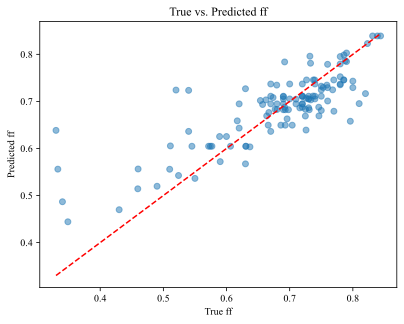

In [13]:
# 1. data split
X_ff = data.iloc[:, :25]  # X feature
y_ff = data['FF']  # target feature
X_ff_train, X_ff_test, y_ff_train, y_ff_test = train_test_split(X_ff, y_ff, test_size=0.2, random_state=42)

# 2. GBDT model
# parameter grid
param_grid_ff = {
    'learning_rate': [0.03, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Gradient-boosted decision trees regressor
gbdt_reg_ff = GradientBoostingRegressor(random_state=42) 

# 3. Grid searching for ff
grid_ff_search = GridSearchCV(
    estimator=gbdt_reg_ff,
    param_grid=param_grid_ff,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_ff_search.fit(X_ff_train, y_ff_train)

# Best model for ff
best_gbdt_reg_ff = grid_ff_search.best_estimator_


# 4. Model evaluation on test set for ff
y_ff_pred = best_gbdt_reg_ff.predict(X_ff_test)
mse_ff = mean_squared_error(y_ff_test, y_ff_pred)
rmse_ff = mse_ff**0.5
mae_ff = mean_absolute_error(y_ff_test, y_ff_pred)
r2_ff = r2_score(y_ff_test, y_ff_pred)

print(f"Best Parameters for ff: {grid_ff_search.best_params_}")
print(f"MSE: {mse_ff:.4f}, RMSE: {rmse_ff:.4f}, R²: {r2_ff:.4f}, MAE:{mae_ff}")

# 5. Get cross-validation results for ff
cv_ff_results_df = pd.DataFrame(grid_ff_search.cv_results_)
cv_ff_results_df = cv_ff_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for ff
best_cv_ff_score_r2 = grid_ff_search.best_score_
best_cv_ff_score_neg_mse = -grid_ff_search.cv_results_['mean_test_neg_mse'][grid_ff_search.best_index_]

for index, row in cv_ff_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for ff: {best_cv_ff_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for ff: {best_cv_ff_score_neg_mse}")
print(f"Best parameters via GridSearchCV for ff: {grid_ff_search.best_params_}")


# 6. Visualization for ff
plt.scatter(y_ff_test, y_ff_pred, alpha=0.5)
plt.plot([y_ff_test.min(), y_ff_test.max()], [y_ff_test.min(), y_ff_test.max()], 'r--')
plt.xlabel('True ff')
plt.ylabel('Predicted ff')
plt.title('True vs. Predicted ff')
plt.show()

### **PCE**

Best Parameters for pce: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.9}
MSE: 2.6620, RMSE: 1.6316, MAE:1.171905, R²: 0.9282 
Params: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.9}
Mean Test R²: 0.8633775059046209
Mean Test Neg MSE: -4.662840894181659
Std Test R²: 0.06385231504270084
Std Test Neg MSE: 1.9101943356424975
--------------------------------------------------
Params: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 0.9}
Mean Test R²: 0.862228668284747
Mean Test Neg MSE: -4.692589434876862
Std Test R²: 0.06654472657416849
Std Test Neg MSE: 1.984613461368779
--------------------------------------------------
Params: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 0.97}
Mean Test R²: 0.8601272475304798
Mean Test Neg MSE: -4.752794413793066
Std Test R²: 0.06746337471244077

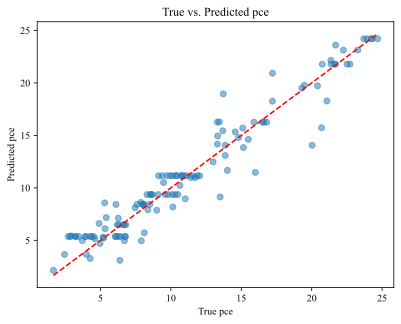

In [14]:
# 1. data split
X_pce = data.iloc[:, :25]  # X feature
y_pce = data['PCE']  # target feature
X_pce_train, X_pce_test, y_pce_train, y_pce_test = train_test_split(X_pce, y_pce, test_size=0.2, random_state=41)

# 2. GBDT model
# parameter grid
param_grid_pce = {
    'learning_rate': [ 0.05, 0.1, 0.15 ],
    'n_estimators': [ 200, 300],
    'subsample': [0.9, 0.95, 0.97],
    'max_depth': [ 10, 11],
    'max_features': ['sqrt']
}

# Initialize Gradient-boosted decision trees regressor
gbdt_reg_pce = GradientBoostingRegressor(random_state=42) 

# 3. Grid searching for pce
grid_pce_search = GridSearchCV(
    estimator=gbdt_reg_pce,
    param_grid=param_grid_pce,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_pce_search.fit(X_pce_train, y_pce_train)

# Best model for pce
best_gbdt_reg_pce = grid_pce_search.best_estimator_


# 4. Model evaluation on test set for pce
y_pce_pred = best_gbdt_reg_pce.predict(X_pce_test)
mse_pce = mean_squared_error(y_pce_test, y_pce_pred)
rmse_pce = mse_pce**0.5
mae_pce = mean_absolute_error(y_pce_test, y_pce_pred)
r2_pce = r2_score(y_pce_test, y_pce_pred)

print(f"Best Parameters for pce: {grid_pce_search.best_params_}")
print(f"MSE: {mse_pce:.4f}, RMSE: {rmse_pce:.4f}, MAE:{mae_pce:4f}, R²: {r2_pce:.4f} ")

# 5. Get cross-validation results for pce
cv_pce_results_df = pd.DataFrame(grid_pce_search.cv_results_)
cv_pce_results_df = cv_pce_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for pce
best_cv_pce_score_r2 = grid_pce_search.best_score_
best_cv_pce_score_neg_mse = -grid_pce_search.cv_results_['mean_test_neg_mse'][grid_pce_search.best_index_]

for index, row in cv_pce_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for pce: {best_cv_pce_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for pce: {best_cv_pce_score_neg_mse}")
print(f"Best parameters via GridSearchCV for pce: {grid_pce_search.best_params_}")


# 6. Visualization for pce
plt.scatter(y_pce_test, y_pce_pred, alpha=0.5)
plt.plot([y_pce_test.min(), y_pce_test.max()], [y_pce_test.min(), y_pce_test.max()], 'r--')
plt.xlabel('True pce')
plt.ylabel('Predicted pce')
plt.title('True vs. Predicted pce')
plt.show()

# SHAP解释器

In [15]:
import shap
shap.initjs()

### For pce

In [16]:
explainer = shap.explainers.Permutation(best_gbdt_reg_pce.predict, X_pce)
shap_values = explainer.shap_values(X_pce)

PermutationExplainer explainer: 621it [01:13,  8.11it/s]                         


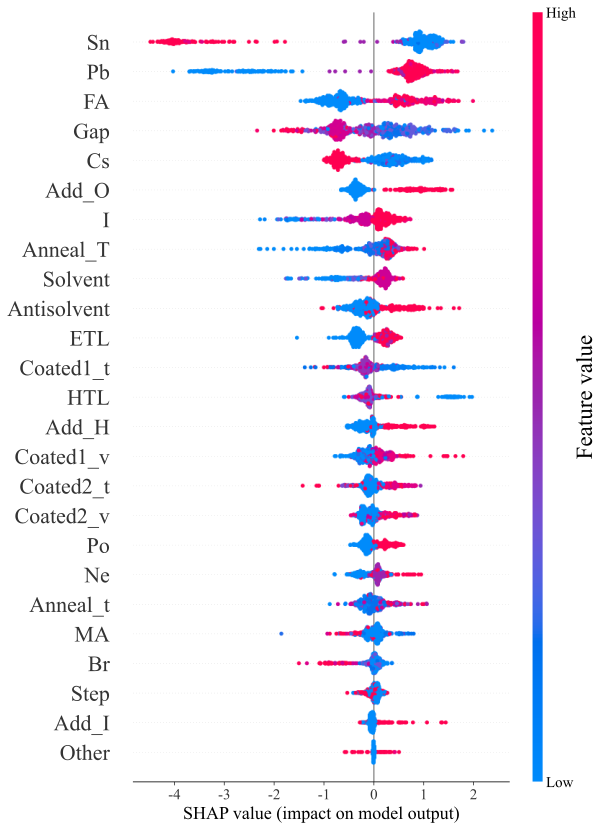

In [72]:
import shap
import matplotlib.pyplot as plt
import matplotlib

# --- 1. 全局字体配置 ---
# 设置全局字体族为 serif (衬线字体)
plt.rcParams["font.family"] = "serif"
# 将具体的衬线字体指定为 Times New Roman
plt.rcParams["font.serif"] = ["Times New Roman"]
# 解决负号显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 假设 shap_values, X_pce 已经定义
# 2. 生成 SHAP 摘要图
shap.summary_plot(shap_values, X_pce, max_display=30, show=False) 

# 3. 获取当前的 Axes 对象并微调大小
ax = plt.gca()

# 字体大小设置 (由于已经设置了全局字体，这里只需调整 size)
ax.tick_params(axis='y', labelsize=22) 
ax.tick_params(axis='x', labelsize=15) 
ax.set_xlabel(ax.get_xlabel(), fontsize=18, family='serif') 

# --- 4. 修改颜色条 (Colorbar) 字体 ---
fig = plt.gcf()
# SHAP 的颜色条通常是图中的最后一个 Axes
cbar_ax = fig.get_axes()[-1] 

# 获取颜色条的 Y 轴标题并重新设置
cbar_ylabel = cbar_ax.get_ylabel() 
cbar_ax.set_ylabel(cbar_ylabel, fontsize=23, family='serif')

# 修改颜色条本身的刻度字体大小
cbar_ax.tick_params(labelsize=15)

# 5. 显示图表
plt.show()

In [59]:
import numpy as np
import pandas as pd  


shap_values_array_pce = shap_values  
shap_values_abs_mean = np.abs(shap_values_array_pce).mean(axis=0)

feature_importance = pd.DataFrame({ 
    'feature': X_pce_test.columns, 
    'importance': shap_values_abs_mean 
}) 
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
4,Sn,1.566496
3,Pb,1.208435
1,FA,0.735303
8,Gap,0.627872
2,Cs,0.508095
13,Add_O,0.490126
6,I,0.357449
23,Anneal_T,0.336103
17,Solvent,0.325804
22,Antisolvent,0.311550


# Predict fig

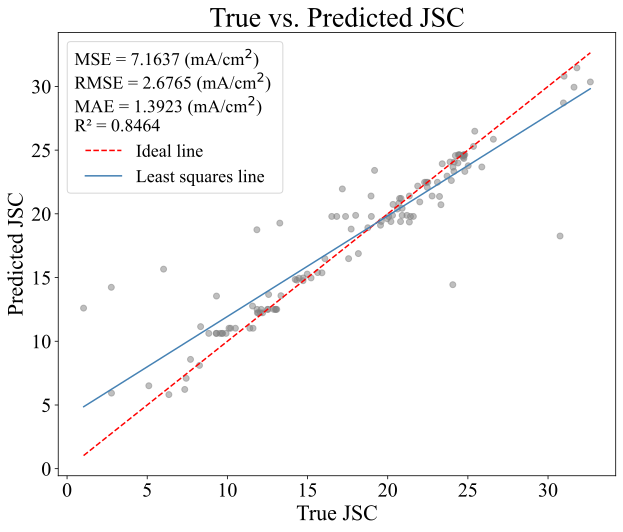

In [35]:
import numpy as np

plt.figure(figsize=(10, 8))
plt.scatter(y_jsc_test, y_jsc_pred, alpha=0.5, color = 'gray')
plt.plot([y_jsc_test.min(), y_jsc_test.max()], [y_jsc_test.min(), y_jsc_test.max()], 'r--', label = 'Ideal line')
m_pce, c_pce = np.polyfit(y_jsc_test, y_jsc_pred, 1)  # least squares regression
plt.plot(y_jsc_test, m_pce * y_jsc_test + c_pce, color='SteelBlue', label='Least squares line')



plt.xlabel('True JSC', fontsize = 22)
plt.ylabel('Predicted JSC', fontsize = 22)
plt.title('True vs. Predicted JSC', fontsize = 28)

plt.legend(title = 'MSE = 7.1637 (mA/cm$^2$) \nRMSE = 2.6765 (mA/cm$^2$) \nMAE = 1.3923 (mA/cm$^2$) \nR² = 0.8464', fontsize = 18, title_fontsize = 18, loc = 'upper left')
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

plt.savefig('high_quality_plot.svg')
plt.show()

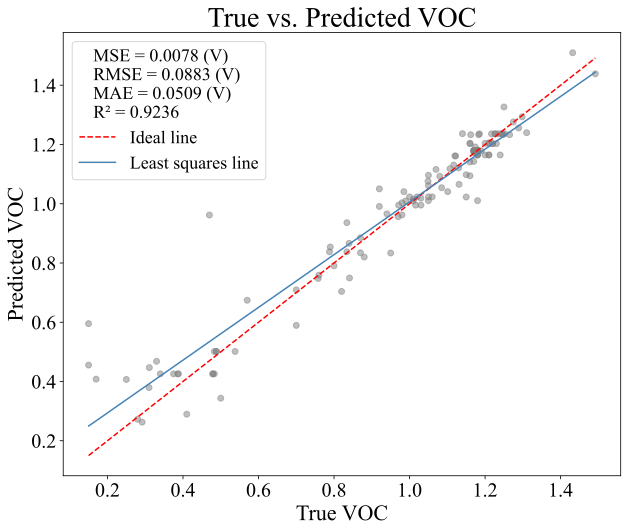

In [36]:
import numpy as np

plt.figure(figsize=(10, 8))
plt.scatter(y_voc_test, y_voc_pred, alpha=0.5, color = 'gray')
plt.plot([y_voc_test.min(), y_voc_test.max()], [y_voc_test.min(), y_voc_test.max()], 'r--', label = 'Ideal line')
m_pce, c_pce = np.polyfit(y_voc_test, y_voc_pred, 1)  # least squares regression
plt.plot(y_voc_test, m_pce * y_voc_test + c_pce, color='SteelBlue', label='Least squares line')



plt.xlabel('True VOC', fontsize = 22)
plt.ylabel('Predicted VOC', fontsize = 22)
plt.title('True vs. Predicted VOC', fontsize = 28)

plt.legend(title = 'MSE = 0.0078 (V) \nRMSE = 0.0883 (V) \nMAE = 0.0509 (V) \nR² = 0.9236', fontsize = 18, title_fontsize = 18)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

plt.savefig('high_quality_plot.svg')
plt.show()

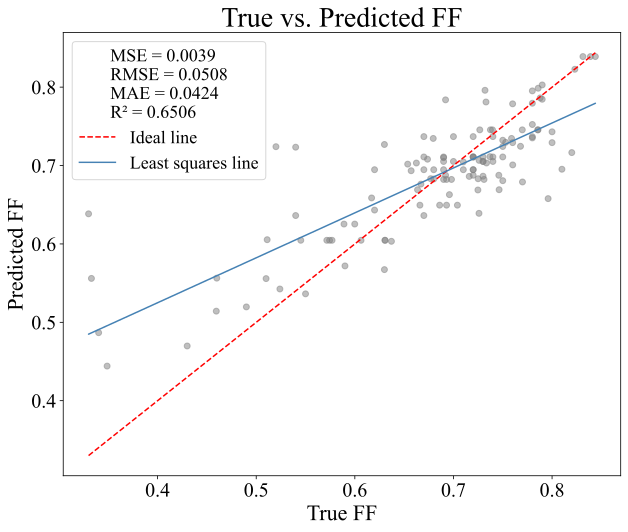

In [37]:
import numpy as np

plt.figure(figsize=(10, 8))
plt.scatter(y_ff_test, y_ff_pred, alpha=0.5, color = 'gray')
plt.plot([y_ff_test.min(), y_ff_test.max()], [y_ff_test.min(), y_ff_test.max()], 'r--', label = 'Ideal line')
m_pce, c_pce = np.polyfit(y_ff_test, y_ff_pred, 1)  # least squares regression
plt.plot(y_ff_test, m_pce * y_ff_test + c_pce, color='SteelBlue', label='Least squares line')

plt.xlabel('True FF', fontsize = 22)
plt.ylabel('Predicted FF', fontsize = 22)
plt.title('True vs. Predicted FF', fontsize = 28)

plt.legend(title = 'MSE = 0.0039\nRMSE = 0.0508\nMAE = 0.0424\nR² = 0.6506', fontsize = 18, title_fontsize = 18)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

plt.savefig('high_quality_plot.svg')
plt.show()

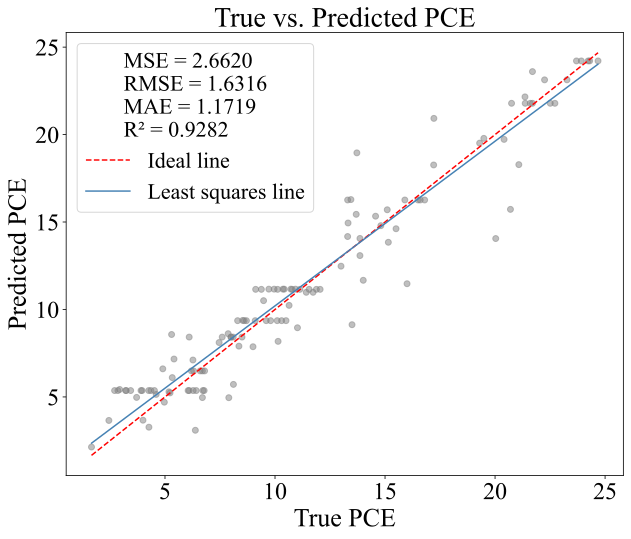

In [73]:
import numpy as np

plt.figure(figsize=(10, 8))
plt.scatter(y_pce_test, y_pce_pred, alpha=0.5, color = 'gray')
plt.plot([y_pce_test.min(), y_pce_test.max()], [y_pce_test.min(), y_pce_test.max()], 'r--', label = 'Ideal line')
m_pce, c_pce = np.polyfit(y_pce_test, y_pce_pred, 1)  # least squares regression
plt.plot(y_pce_test, m_pce * y_pce_test + c_pce, color='SteelBlue', label='Least squares line')

plt.xlabel('True PCE', fontsize = 26)
plt.ylabel('Predicted PCE', fontsize = 26)
plt.title('True vs. Predicted PCE', fontsize = 28)

plt.legend(title = 'MSE = 2.6620\nRMSE = 1.6316\nMAE = 1.1719\nR² = 0.9282 ', fontsize =22, title_fontsize = 22)
plt.xticks(fontsize=24) 
plt.yticks(fontsize=24) 

plt.savefig('high_quality_plot.svg')
plt.show()

# permutation_importance

In [69]:
from sklearn.inspection import permutation_importance

# extract feature importance

result = permutation_importance(best_gbdt_reg_ff, X_ff_test, y_ff_test, n_repeats=14, random_state=42)
importances = result.importances_mean
std = result.importances_std

feature_names = X_ff_test.columns

# creat a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,

})

# order rank
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# print feature importance
print(feature_importance_df)


        Feature  Importance
4            Sn    0.155403
3            Pb    0.132415
17      Solvent    0.108728
13        Add_O    0.106036
23     Anneal_T    0.096382
10          ETL    0.062971
8           Gap    0.062476
12           Ne    0.030459
21    Coated2_t    0.028268
11          HTL    0.015493
24     Anneal_t    0.013615
2            Cs    0.012365
16         Step    0.009680
19    Coated1_t    0.009655
1            FA    0.009598
14        Add_I    0.006500
15        Add_H    0.005245
18    Coated1_v    0.005074
9            Po    0.004594
20    Coated2_v    0.004204
0            MA    0.001032
22  Antisolvent    0.000520
5         Other   -0.001051
7            Br   -0.012192
6             I   -0.019540
